In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf 
import matplotlib.pyplot as plt
import json
tf.config.list_physical_devices("GPU")

2023-07-15 21:06:58.107597: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-15 21:06:58.922444: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-15 21:07:01.599974: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-15 21:07:01.619335: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Import Data

In [2]:
dataset = pd.read_csv('../data/data_tiger.csv', index_col=0)
dataset['label'] = [int(s[-1]) for s in dataset['label']]
dataset

,index,middle,ring,pinky,label
0,"[743.0, 743.1, 743.2, 743.3, 743.4, 743.5, 743...","[573.0, 573.0, 573.0, 573.0, 573.0, 573.0, 573...","[568.0, 568.0, 568.0, 568.0, 568.0, 568.0, 568...","[708.0, 708.0, 708.1, 708.1, 708.3, 708.5, 708...",0
1,"[743.2, 743.2, 743.4, 743.7, 744.0, 744.3, 744...","[572.0, 572.1, 572.1, 572.2, 572.3, 572.4, 572...","[567.0, 567.0, 567.0, 567.0, 567.0, 567.0, 567...","[709.2, 709.3, 709.6, 710.1, 710.8, 711.6, 712...",0
2,"[743.0, 743.0, 743.0, 743.0, 743.0, 743.1, 743...","[572.0, 572.0, 572.0, 572.0, 572.0, 572.0, 572...","[567.0, 567.0, 567.0, 567.0, 567.0, 567.0, 567...","[705.8, 706.0, 706.2, 706.5, 706.9, 707.3, 707...",0
3,"[742.2, 742.2, 742.3, 742.4, 742.5, 742.6, 742...","[572.0, 572.0, 572.0, 572.0, 572.0, 572.0, 572...","[567.0, 567.0, 567.0, 567.1, 567.1, 567.1, 567...","[707.4, 707.4, 707.3, 707.2, 707.2, 707.2, 707...",0
4,"[742.0, 742.0, 742.0, 742.0, 742.1, 742.2, 742...","[572.0, 572.0, 572.0, 572.0, 572.0, 572.0, 572...","[567.0, 567.0, 567.0, 567.0, 567.0, 567.0, 567...","[704.8, 704.8, 705.0, 705.1, 705.4, 705.7, 706...",0
...,...,...,...,...,...
2295,"[588.0, 588.0, 588.0, 588.0, 588.0, 588.0, 588...","[740.4, 740.5, 740.8, 741.5, 742.4, 743.5, 744...","[744.2, 744.3, 744.6, 745.1, 745.8, 746.7, 747...","[577.0, 577.0, 577.0, 577.0, 577.0, 577.0, 577...",4
2296,"[587.0, 587.0, 587.0, 587.0, 587.0, 587.0, 587...","[740.4, 740.5, 740.8, 741.3, 741.9, 742.8, 743...","[744.0, 744.2, 744.6, 745.2, 746.0, 747.1, 748...","[576.0, 576.0, 576.0, 576.0, 576.1, 576.2, 576...",4
2297,"[583.2, 583.3, 583.4, 583.4, 583.4, 583.5, 583...","[765.8, 765.9, 766.2, 766.8, 767.6, 768.7, 769...","[768.4, 768.6, 769.1, 769.9, 771.0, 772.2, 773...","[575.0, 575.0, 575.0, 575.1, 575.2, 575.3, 575...",4
2298,"[585.0, 585.0, 585.0, 585.0, 585.0, 585.0, 585...","[751.6, 751.8, 752.2, 752.7, 753.4, 754.4, 755...","[755.2, 755.3, 755.7, 756.3, 757.1, 758.2, 759...","[575.0, 575.0, 575.1, 575.2, 575.3, 575.4, 575...",4


# Create Train/Val/Test Dataset

In [3]:
## X
n_steps = len(json.loads(dataset.iloc[0,0]))
n_features = 4
X = np.empty((dataset.shape[0], n_steps*n_features), dtype=np.float64)
for i in range(X.shape[0]):    
    x = []
    for j in range(n_features):
        arr = list(json.loads(dataset.iloc[i,j]))
        x += arr
    X[i] = np.array(x)

## y
labels = dataset["label"].to_numpy()
le = LabelEncoder()
y_encoded = le.fit_transform(labels)
n_classes = len(np.unique(y_encoded))
y = to_categorical(y_encoded)

## split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
print(x_train.shape, y_train.shape)

(1610, 40) (1610, 5)


# Model Training

2023-07-15 21:07:08.481351: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-15 21:07:08.481667: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-15 21:07:08.481791: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_dense (Dense)         (None, 128)               5248      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 second_dense (Dense)        (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 third_dense (Dense)         (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 fourth_dense (Dense)        (None, 32)                1

2023-07-15 21:07:09.700544: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-15 21:07:09.725647: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x55ea2aff9160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-15 21:07:09.725680: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-07-15 21:07:09.730522: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-15 21:07:09.742411: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-15 21:07:09.845371: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifeti

13/13 [==============================] - 2s 16ms/step - loss: 160.9522 - accuracy: 0.2161 - val_loss: 28.5934 - val_accuracy: 0.4174
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 46.4590 - accuracy: 0.2422 - val_loss: 8.7200 - val_accuracy: 0.3478
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 23.7098 - accuracy: 0.2298 - val_loss: 4.7428 - val_accuracy: 0.2507
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 14.0341 - accuracy: 0.2590 - val_loss: 3.1036 - val_accuracy: 0.4145
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 8.9492 - accuracy: 0.2789 - val_loss: 3.1921 - val_accuracy: 0.2188
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 6.5177 - accuracy: 0.2795 - val_loss: 2.2670 - val_accuracy: 0.3551
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 4.7285 - accuracy: 0.3056 - val_loss: 1.4228 - val_accuracy: 0.3884
Epoch 8/150
13/13 

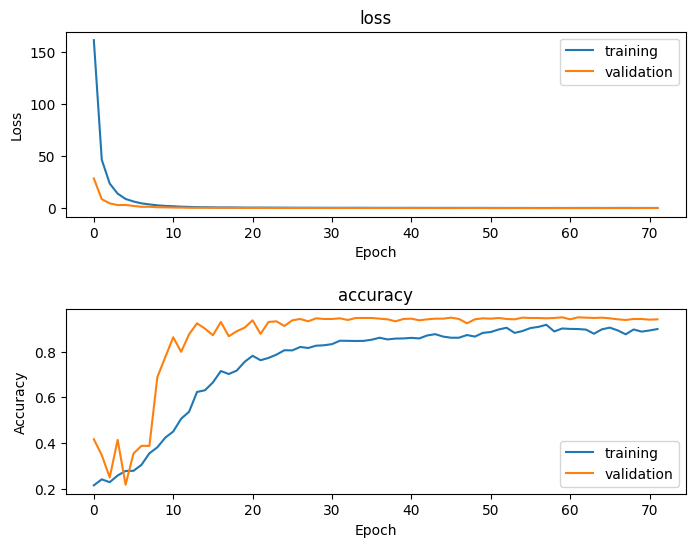

In [4]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(n_steps*n_features,), name='first_dense'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', name='second_dense'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', name='third_dense'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', name='fourth_dense'))
model.add(Dense(n_classes, activation='softmax', name='final_dense'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the MLP model.
callback = EarlyStopping(patience=10)
history = model.fit(x_train, y_train, epochs=150, batch_size=128, validation_data=(x_val, y_val), callbacks=[callback])
fig, axes = plt.subplots(2,1, figsize=(8,6))
axes[0].plot(history.epoch,history.history['loss'], label='training')
axes[0].plot(history.epoch,history.history['val_loss'], label='validation')
axes[0].set_title('loss')
axes[0].legend(loc='best')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
fig.subplots_adjust(hspace=0.5)
axes[1].plot(history.epoch,history.history['accuracy'], label='training')
axes[1].plot(history.epoch,history.history['val_accuracy'], label='validation')
axes[1].set_title('accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best');

In [5]:
print("Train accuracy:", history.history["accuracy"][-1])
print("Validation accuracy:", history.history["val_accuracy"][-1])

Train accuracy: 0.8981366753578186
Validation accuracy: 0.9405797123908997


# Model Evaluation

In [6]:
model.save("../models/mlp_tiger")
# model = keras.models.load_model("../models/model2")

2023-07-15 21:07:33.636489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-07-15 21:07:33.650589: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-07-15 21:07:33.662137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-07-15 21:07:3

INFO:tensorflow:Assets written to: ../models/mlp_tiger/assets


Precision: 0.950586188202372
Recall: 0.9377252886585854
F1-score: 0.9397559512637328


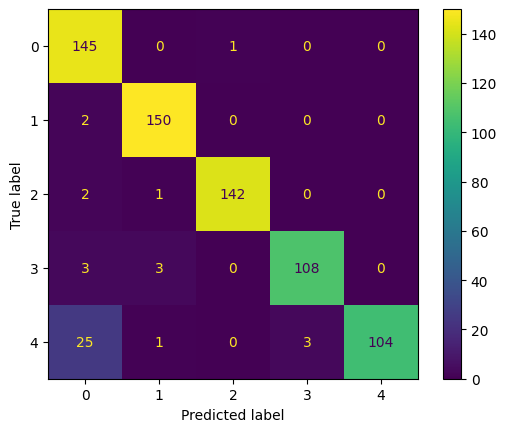

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import seaborn as sn
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(x_val, verbose=0)
y_pred_rd = np.argmax(y_pred, axis=1)
y_val_rd = np.argmax(y_val, axis=1)

print("Precision:", precision_score(y_val_rd, y_pred_rd, average="macro"))
print("Recall:", recall_score(y_val_rd, y_pred_rd, average="macro"))
print("F1-score:", f1_score(y_val_rd, y_pred_rd, average="macro"))

cm = confusion_matrix(y_val_rd, y_pred_rd)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(n_classes))
disp.plot()
# df_cm = pd.DataFrame(cm, range(n_classes), range(n_classes))
# # plt.figure(figsize=(13,11))
# # sn.set(font_scale=1) # for label size
# ticklabels = np.unique(labels)
# sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt="d",
#            xticklabels=ticklabels, yticklabels=ticklabels) # font size
plt.show()

In [8]:
import time 
times = []
for i in range(100):
    start = time.time()
    y_prediction = model.predict(x_val, verbose=0) 
    end = time.time()
    times.append((end - start)/x_val.shape[0] * 1000)
print("Inference time: %f ms" % (np.mean(np.array(times))))

Inference time: 0.082894 ms


In [15]:
model.save("mlp")

INFO:tensorflow:Assets written to: mlp/assets


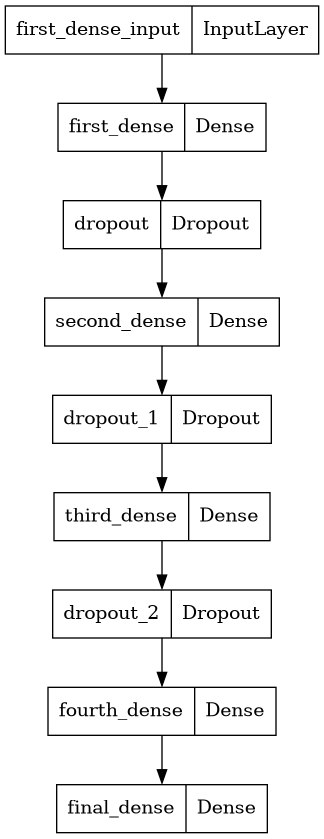

In [4]:
keras.utils.plot_model(model)